In [83]:
# Fuente desde donde hemos sacado los datos
# https://zenodo.org/record/4252636
import pandas as pd
# Leemos el dataset
cochesUsados = pd.read_csv('cochesPracticaOriginal.csv')
cochesUsadosOriginal = cochesUsados.copy()

In [84]:
def cleanData(data):
    # Eliminamos columnas innecesarias
    data.drop(['Unnamed: 0','car_desc', 'image_url', 'ad_id','ad_type', 'ad_time', 'ts','car_door_num'], axis=1, inplace=True)
    # Eliminamos lineas incorrectas csv
    data= data[(data['ad_title'] != 'ad_title') & (data['car_year'].str.isnumeric())]
    # Eliminamos lineas con valores nulos
    data = data.dropna()
    return data
    
# Limpiamos dataset
cochesUsados = cleanData(cochesUsados)

In [85]:
# Guardamos los datos previamente limpiados en un nuevo fichero
pd.DataFrame.to_csv(cochesUsados,'cochesFinal.csv', index=False)

In [86]:
# Cargamos los datos limpiados y añadimos cabeceras
cochesUsados = pd.read_csv('cochesFinal.csv')

In [87]:
def splitBrand(carTitle):
    dataArray = carTitle.split('-')
    brand = dataArray[0:-1]
    brand = ' '.join(brand).strip()
    return brand

def splitModel(carTitle):
    dataArray = carTitle.split('-')
    model = dataArray[-1]
    return str(model).strip()

def removeTextAndGetInt(text,toBeRemoved):
    try:
        return int(text.replace(toBeRemoved,''))
    except ValueError:
        return int(0)

def addExtraFieldsToDataset():
    cochesUsados['brand'] = cochesUsados.apply(lambda row : splitBrand(row['ad_title']), axis = 1)
    cochesUsados['model'] = cochesUsados.apply(lambda row : splitModel(row['ad_title']), axis = 1)
    cochesUsados['car_power'] = cochesUsados.apply(lambda row : removeTextAndGetInt(row['car_power'],'CV'), axis = 1)
    cochesUsados['car_km'] = cochesUsados.apply(lambda row : removeTextAndGetInt(row['car_km'],'kms'), axis = 1)
    
addExtraFieldsToDataset()

In [88]:
# Mostramos el numero de filas y columnas de nuestro dataset
print('El numero de filas es:', cochesUsados.shape[0])
print('El numero de columnas es:', cochesUsados.shape[1])

El numero de filas es: 227898
El numero de columnas es: 10


In [89]:
# Visualizamos los 5 primeros registros
cochesUsados.head()

,ad_title,car_km,car_year,car_engine_type,car_power,car_price,advertizer_type,region,brand,model
0,CITROEN - C5 AIRCROSS,2,2020,Manual,131,19590,Profesional,alava,CITROEN,C5 AIRCROSS
1,CITROEN - C5 AIRCROSS,2,2020,Manual,131,17490,Profesional,alava,CITROEN,C5 AIRCROSS
2,CITROEN - JUMPY,0,2007,Manual,120,7300,Particular,alava,CITROEN,JUMPY
3,MAZDA - PREMACY,0,2004,Manual,100,1700,Particular,alava,MAZDA,PREMACY
4,MERCEDES-BENZ - CLASE E,0,2007,Automático,195,8900,Particular,alava,MERCEDES BENZ,CLASE E


In [90]:
# Visualizamos los 5 ultimos registros
cochesUsados.tail()

,ad_title,car_km,car_year,car_engine_type,car_power,car_price,advertizer_type,region,brand,model
227893,BMW - SERIE 2 ACTIVE TOURER 216D,0,2016,Automático,116,14813,Profesional,zaragoza,BMW,SERIE 2 ACTIVE TOURER 216D
227894,PEUGEOT - 3008 1.5L BLUEHDI 96KW 130CV SS ACTIVE,0,2018,Manual,130,19772,Profesional,zaragoza,PEUGEOT,3008 1.5L BLUEHDI 96KW 130CV SS ACTIVE
227895,SEAT - ALHAMBRA 2.0 TDI 140CV REFERENCE PLUS,0,2008,Manual,140,8900,Profesional,zaragoza,SEAT,ALHAMBRA 2.0 TDI 140CV REFERENCE PLUS
227896,HONDA - CRV 2.0 IVTEC ELEGANCE,0,2015,Manual,155,18130,Profesional,zaragoza,HONDA,CRV 2.0 IVTEC ELEGANCE
227897,VOLKSWAGEN - POLO 1.2 TSI 90CV DSG ADVANCE,0,2013,Automático,90,10500,Profesional,zaragoza,VOLKSWAGEN,POLO 1.2 TSI 90CV DSG ADVANCE


In [91]:
# Mostramos información sobre los tipos de datos que tenemos en nuestro dataset
cochesUsados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227898 entries, 0 to 227897
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ad_title         227898 non-null  object
 1   car_km           227898 non-null  int64 
 2   car_year         227898 non-null  int64 
 3   car_engine_type  227898 non-null  object
 4   car_power        227898 non-null  int64 
 5   car_price        227898 non-null  int64 
 6   advertizer_type  227898 non-null  object
 7   region           227898 non-null  object
 8   brand            227898 non-null  object
 9   model            227898 non-null  object
dtypes: int64(4), object(6)
memory usage: 17.4+ MB


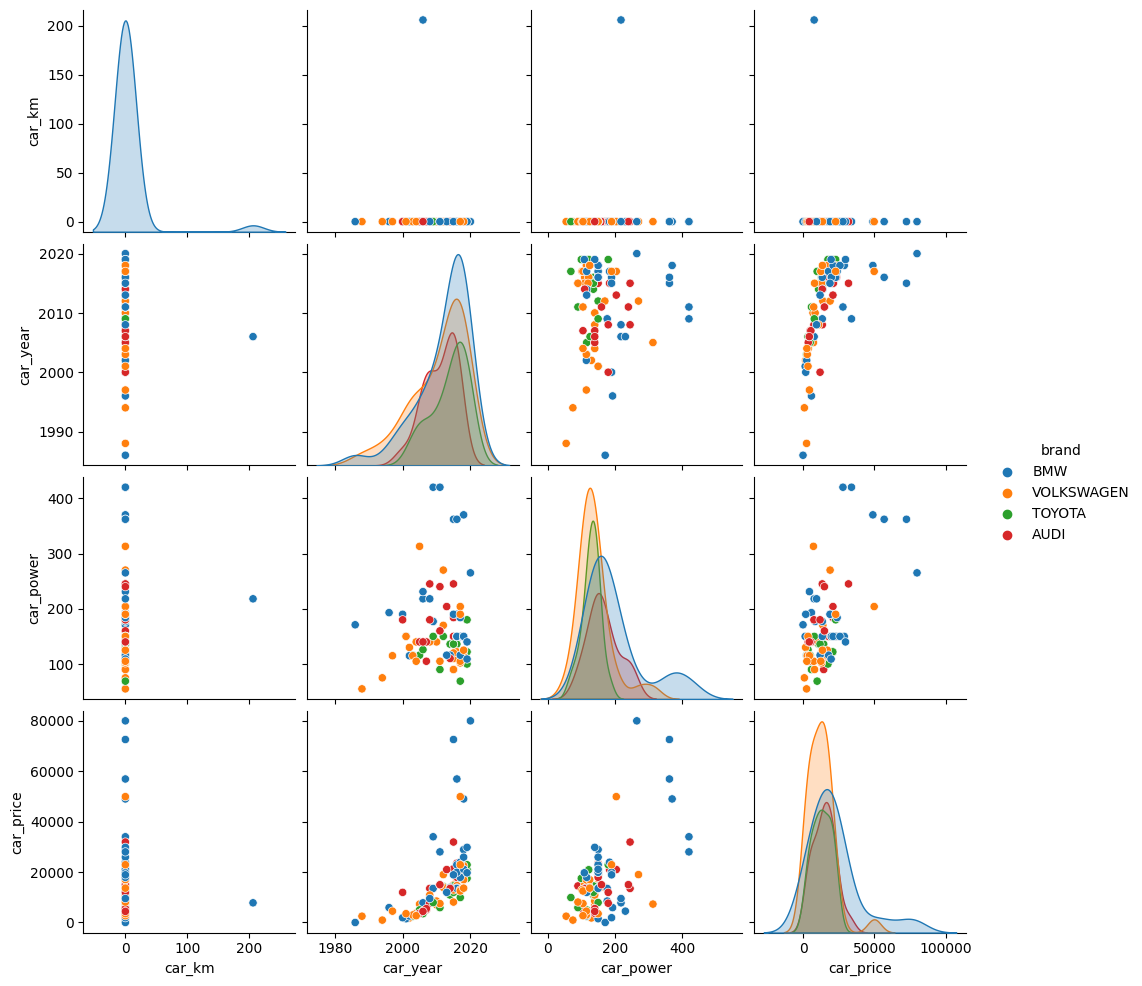

In [92]:
import seaborn as sb
sb.pairplot(cochesUsados[cochesUsados['brand'].isin(['AUDI', 'BMW','TOYOTA','VOLKSWAGEN'])][0:100], hue="brand", x_vars=[
            'car_km', 'car_year', 'car_power', 'car_price'], y_vars=['car_km', 'car_year', 'car_power', 'car_price'])


<AxesSubplot: >

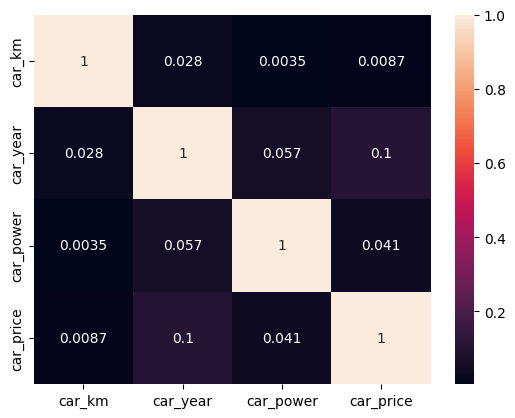

In [93]:
sb.heatmap(cochesUsados[['car_km', 'car_year', 'car_power', 'car_price']].corr(),annot=True)

<AxesSubplot: >

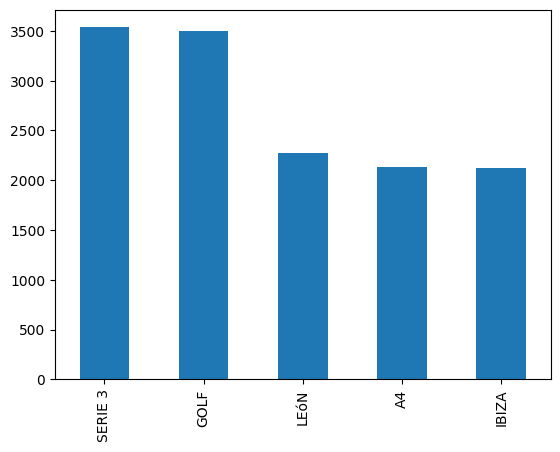

In [94]:
import seaborn as sb
import matplotlib.pyplot as plt
#Mostramos el top de modelos con el mayor numero de coincidencias
cochesUsados['model'].value_counts().iloc[:5].plot(kind="bar")

C:\Users\Djmir\AppData\Local\Temp\ipykernel_1672\2136871324.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = cochesUsados[cochesUsados['brand'].isin(['AUDI', 'BMW','TOYOTA','VOLKSWAGEN','MERCEDES-BENZ','FORD','OPEL'])].groupby(['brand']).mean()


<AxesSubplot: xlabel='brand', ylabel='car_price'>

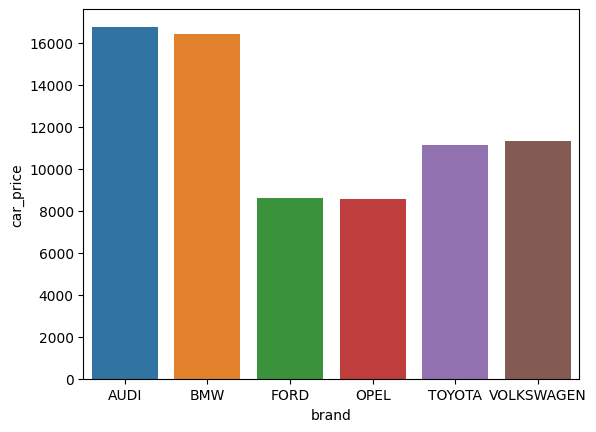

In [95]:
import matplotlib.pyplot as plt

grouped = cochesUsados[cochesUsados['brand'].isin(['AUDI', 'BMW','TOYOTA','VOLKSWAGEN','MERCEDES-BENZ','FORD','OPEL'])].groupby(['brand']).mean()
grouped = grouped.reset_index()

sb.barplot(data=grouped,x='brand',y='car_price')

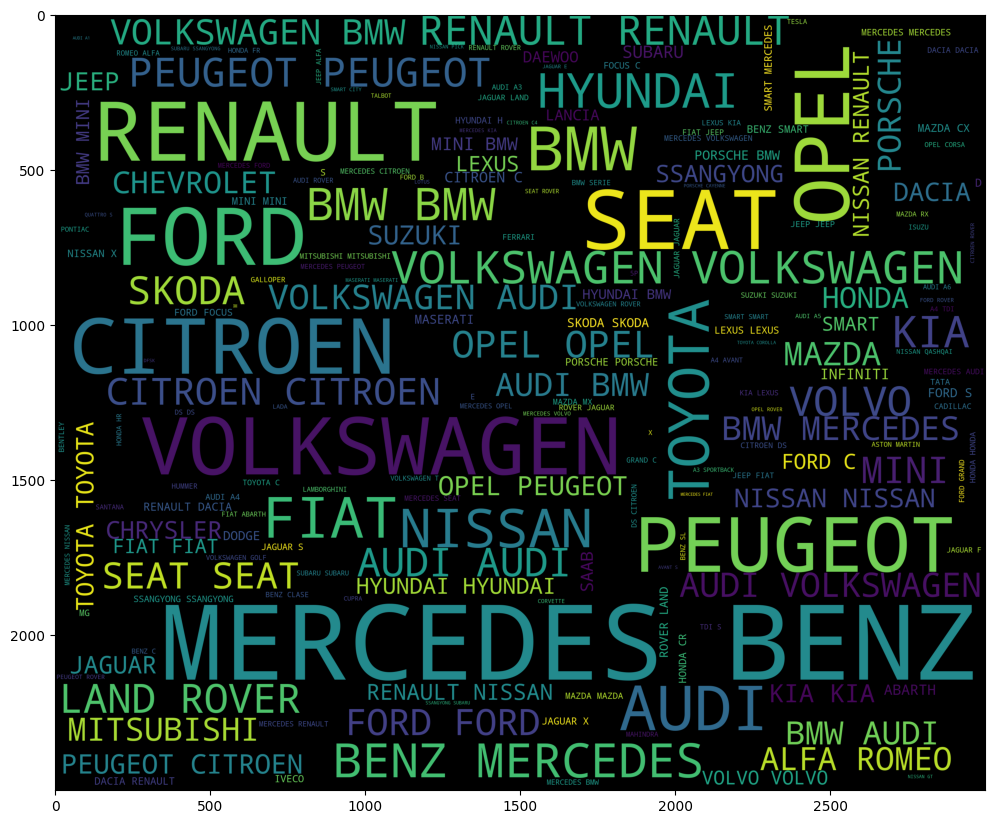

In [96]:
from wordcloud import WordCloud,STOPWORDS

res = " ".join(cochesUsados['brand'])
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',width=3000,height=2500).generate(res)

import matplotlib.pyplot as plt
plt.figure(1,figsize=(12,12))
plt.imshow(wordcloud)
plt.show()

In [97]:
cochesUsados



,ad_title,car_km,car_year,car_engine_type,car_power,car_price,advertizer_type,region,brand,model
0,CITROEN - C5 AIRCROSS,2,2020,Manual,131,19590,Profesional,alava,CITROEN,C5 AIRCROSS
1,CITROEN - C5 AIRCROSS,2,2020,Manual,131,17490,Profesional,alava,CITROEN,C5 AIRCROSS
2,CITROEN - JUMPY,0,2007,Manual,120,7300,Particular,alava,CITROEN,JUMPY
3,MAZDA - PREMACY,0,2004,Manual,100,1700,Particular,alava,MAZDA,PREMACY
4,MERCEDES-BENZ - CLASE E,0,2007,Automático,195,8900,Particular,alava,MERCEDES BENZ,CLASE E
...,...,...,...,...,...,...,...,...,...,...
227893,BMW - SERIE 2 ACTIVE TOURER 216D,0,2016,Automático,116,14813,Profesional,zaragoza,BMW,SERIE 2 ACTIVE TOURER 216D
227894,PEUGEOT - 3008 1.5L BLUEHDI 96KW 130CV SS ACTIVE,0,2018,Manual,130,19772,Profesional,zaragoza,PEUGEOT,3008 1.5L BLUEHDI 96KW 130CV SS ACTIVE
227895,SEAT - ALHAMBRA 2.0 TDI 140CV REFERENCE PLUS,0,2008,Manual,140,8900,Profesional,zaragoza,SEAT,ALHAMBRA 2.0 TDI 140CV REFERENCE PLUS
227896,HONDA - CRV 2.0 IVTEC ELEGANCE,0,2015,Manual,155,18130,Profesional,zaragoza,HONDA,CRV 2.0 IVTEC ELEGANCE


In [98]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
le = preprocessing.LabelEncoder()
scaler = StandardScaler()


#Labels encoders (brand, model, region, advertizer_type, car_engine_type)
def generateLabelEncoder(data):
    global le
    for key in ['brand','advertizer_type','model','region','car_engine_type']:
        if data[key] is not None:
            data[key] = le.fit_transform(data[key])
            
    else:
        return data


In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from itertools import cycle


cochesUsadosSinPrecio = cochesUsados.copy()

soloPrecioCoches = cochesUsadosSinPrecio['car_price']
cochesUsadosSinPrecio.drop(['car_price','ad_title'], axis=1, inplace=True)

# Generamos los labels encoders
cochesUsadosSinPrecio = generateLabelEncoder(cochesUsadosSinPrecio)    
scaler.fit(cochesUsadosSinPrecio)
cochesUsadosSinPrecio = scaler.transform(cochesUsadosSinPrecio)


eighty_percent_trainRawData, twenty_percent_trainRawData, eighty_percent_value_to_compare_results, twenty_percent_value_to_compare_results = train_test_split(
    cochesUsadosSinPrecio, soloPrecioCoches, test_size=0.2)


<AxesSubplot: >

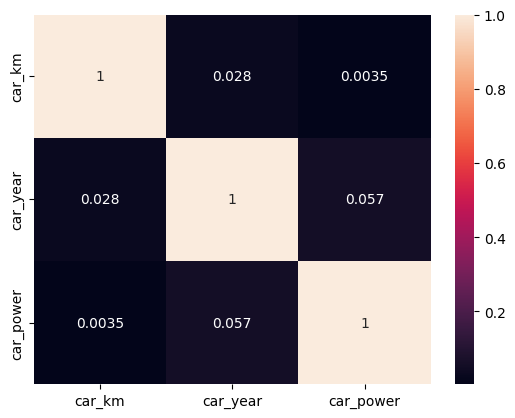

In [103]:
sb.heatmap(cochesUsadosSinPrecio.corr(),annot=True)

In [110]:
model = keras.Sequential()

model.add(Dense(20, activation="tanh", input_shape=(cochesUsadosSinPrecioNormalizados.shape[1],)))
model.add(Dense(1))
          
model.compile(loss='mse', metrics=['mae','mse','accuracy'])
model.summary()

history_reg = model.fit(eighty_percent_trainRawData,eighty_percent_value_to_compare_results, epochs=200,
                        batch_size=256,verbose=1, validation_data=(twenty_percent_trainRawData, twenty_percent_value_to_compare_results))


print("Pesos y bias: ",model.weights)
print("Salida: ",model.output)
#3297440000.0000 


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 20)                80        
                                                                 
 dense_34 (Dense)            (None, 1)                 21        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
713/713 [==============================] - 2s 2ms/step - loss: 4035144960.0000 - mae: 12054.3633 - mse: 4035144960.0000 - accuracy: 0.0017 - val_loss: 3825830912.0000 - val_mae: 12155.9844 - val_mse: 3825830912.0000 - val_accuracy: 0.0013
Epoch 2/200
713/713 [==============================] - 1s 2ms/step - loss: 4034774528.0000 - mae: 12041.0791 - mse: 4034774528.0000 - accuracy: 7.5692e-04 - val_loss: 3825437952.0000 - val_mae: 12138.

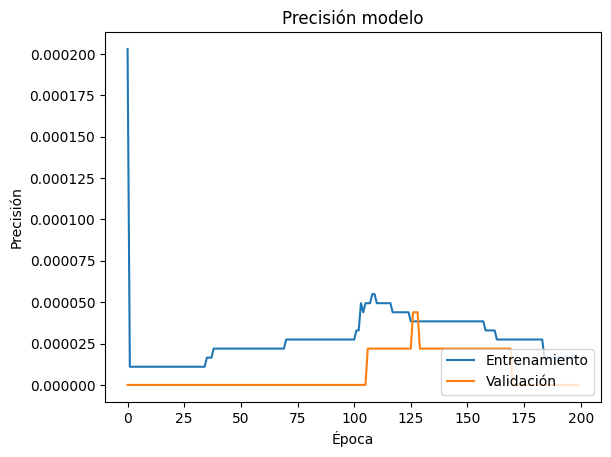

In [ ]:
# Visualizamos la precisión
import matplotlib.pyplot as plt
plt.plot(history_reg.history['accuracy'])
plt.plot(history_reg.history['val_accuracy'])
plt.title('Precisión modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc="lower right")
plt.show()

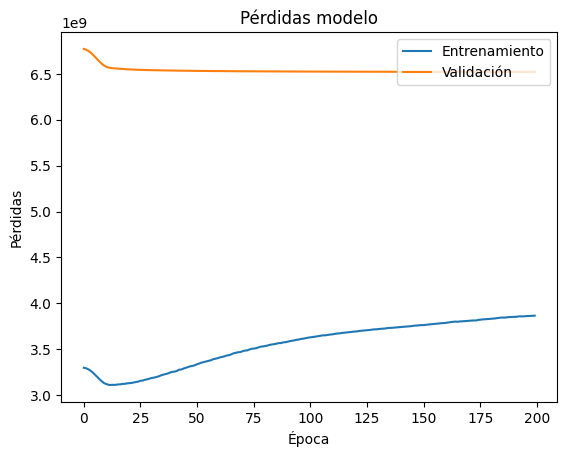

In [ ]:
# Visualizamos pérdidas
plt.plot(history_reg.history['loss'])
plt.plot(history_reg.history['val_loss'])
plt.title('Pérdidas modelo')
plt.ylabel('Pérdidas')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc="upper right")
plt.show()

In [ ]:
pruebas = pd.read_csv('pruebas.csv')
#pruebas = cleanData(pruebas)
pruebas = generateLabelEncoder(pruebas)
pruebas = generateScaler(pruebas)
pruebas.drop('car_price',axis=1,inplace=True)
print(pruebas)

y_test = model.predict(pruebas)
print(y_test)
print(scaler.inverse_transform(y_test))

metrics_evaluation = model.evaluate(twenty_percent_trainRawData, twenty_percent_value_to_compare_results, verbose=0)
print("Precisión en test:", metrics_evaluation[1])



NameError: name 'generateScaler' is not defined

In [ ]:
cochesUsados.to_csv('testExportacion.csv')